In [4]:
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


In [25]:
def solve(alpha, beta, eps, N, h_step):
    # Start making A
    bot_diag = np.ones(N-1)*((eps/h_step)+1/2)
    bot_diag[-1] = 0
    bot_mat = np.diag(bot_diag, k=-1)

    mid_diag = np.ones(N)*((-eps/h_step)-(eps/h_step))
    mid_diag[0], mid_diag[-1] = 1, 1
    main_mat = np.diag(mid_diag)

    top_diag = np.ones(N-1)*((eps/h_step)-1/2)
    top_diag[0] = 0
    top_mat = np.diag(top_diag, k=1)

    A = top_mat + main_mat + bot_mat

    #convert A to sparse
    A = sparse.csr_matrix(A)
    
    #create our phi vector
    phi = np.ones(N)*-h_step
    phi[0], phi[-1] = alpha, beta
    
    #solve for K
    K = spsolve(A, phi)

    return K

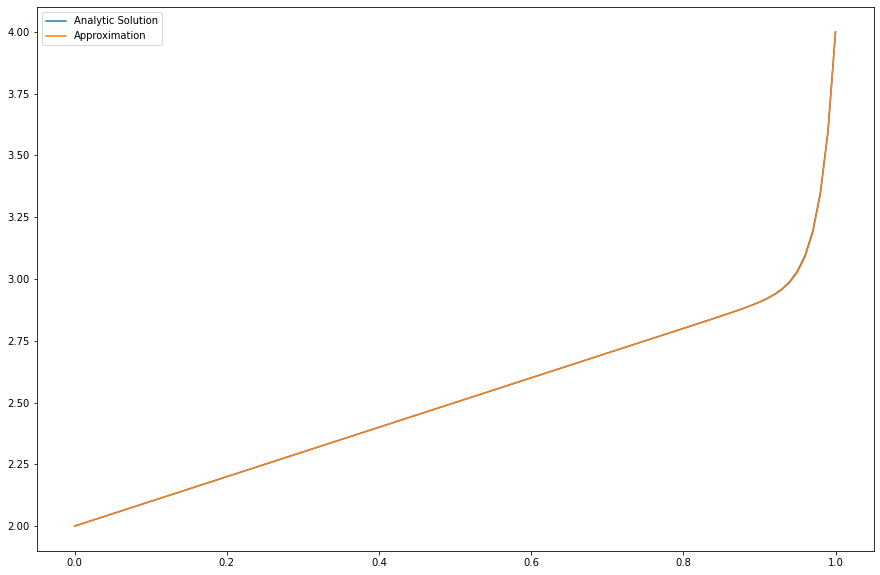

In [6]:
# Define parameters
alpha = 2
beta = 4
eps = .02
N = 101
x = np.linspace(0,1,N)
h = np.zeros_like(x)
h[1:] = x[1:]-x[:-1]

y = lambda x: alpha + x + (beta - alpha - 1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)

# Solve for K
K = solve(alpha, beta, eps, N, h[1])

#plot the approximation against the analytic solution
plt.figure(figsize=((15,10)))
plt.plot(x, y(x), label='Analytic Solution')

plt.plot(x,K,label='Approximation')
plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

In [10]:
def solve_clustered(alpha, beta, eps, N, clustered_grid):
    #create A for clustered grid
    A = np.zeros((N,N))
    for i in range(0,N):
        for j in range(1,N-1):
            if j == (i+1):
                A[j,i] = eps/(clustered_grid[i+1]-clustered_grid[i]) + 1/2

            elif j == i:
                A[j,i] = -1*(eps/(clustered_grid[i]-clustered_grid[i-1]) + eps/(clustered_grid[i+1]-clustered_grid[i]))

            elif j == (i-1):
                A[j,i] = eps/(clustered_grid[i]-clustered_grid[i-1]) - 1/2
            else:
                pass
    A[0,0], A[-1,-1] = 1, 1
    A = sparse.csr_matrix(A)

    #create phi for clustered grid
    phi = np.ones(N)
    phi[0], phi[-1] = alpha, beta

    for j in range(1,N-1):
        phi[j] = (-1/2) * (clustered_grid[j+1]-clustered_grid[j-1])

    #solve for K in clustered case
    K = spsolve(A, phi)
    
    return K

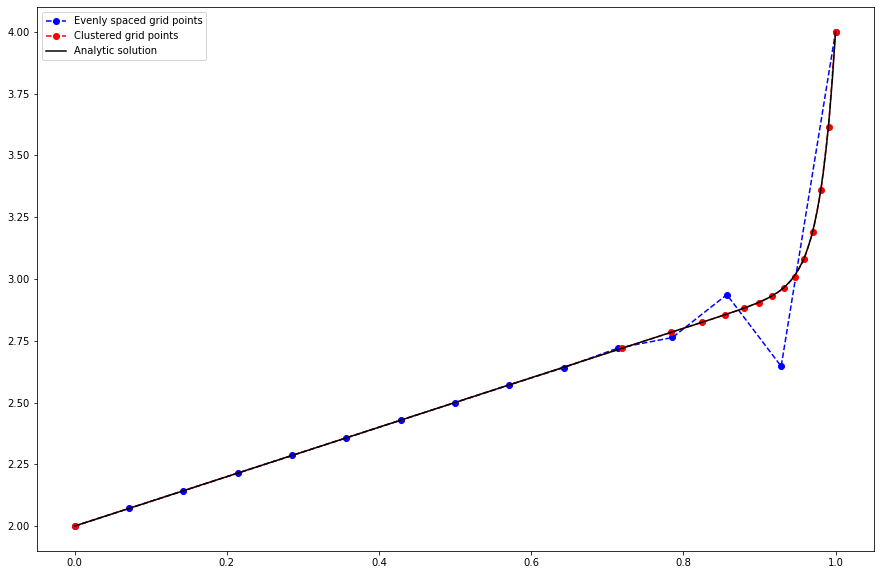

In [11]:
#define our parameters
alpha = 2
beta = 4
a = 0
b = 1
eps = .02
N = 15

x = np.linspace(0,1,250)
h_step = (b-a)/(N-1)

even_grid = np.linspace(a,b,15)
clustered_grid = np.linspace(a,b,15)**(1/8)

#calculate the analytic solution over the domain        
y = lambda x: alpha + x + (beta-alpha-1)*((np.exp(x/eps)-1)/(np.exp(1/eps)-1))

# Solve for K and plot both
K = solve(alpha, beta, eps, N, h_step)

plt.figure(figsize=((15,10)))
plt.plot(even_grid,K,'--b', marker='o', label='Evenly spaced grid points')

K = solve_clustered(alpha, beta, eps, N, clustered_grid)

plt.plot(clustered_grid,K,'--r',marker='o', label='Clustered grid points')
plt.plot(x, y(x), color='black', label='Analytic solution')
plt.legend()
plt.show()

# Problem 3

Solve (11.5) with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

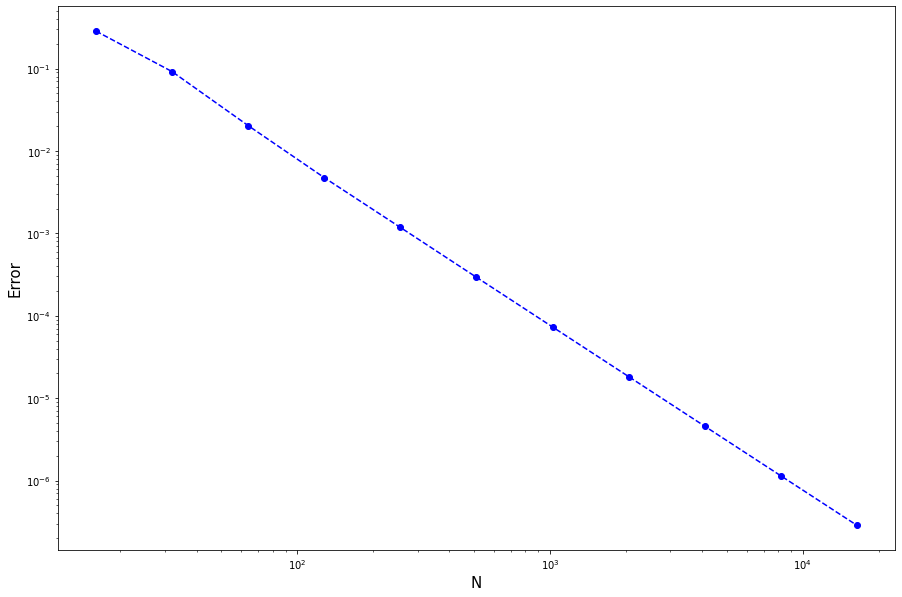

In [28]:
i_s = range(4,15)

#define our parameters
alpha = 2
beta = 4
eps = .02

#calculate the analytic solution over the domain
y = lambda x: alpha + x + (beta-alpha-1)*((np.exp(x/eps)-1)/(np.exp(1/eps)-1))
errors = []

for i in i_s:
    #for each number of elements create the grid
    N = 2**i
    x = np.linspace(0,1,N)
    h_step = (1-0)/(N-1)
    
    # Find K
    K = solve(alpha, beta, eps, N, h_step)
    
    # Calculate and append error
    error = np.max(np.abs(K-y(x)))
    errors.append(error)

# Plot it
plt.figure(figsize=((15,10)))
num_pts = [2**i for i in i_s]
plt.loglog(num_pts, errors,'--',marker='o')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()